In [10]:
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#This dataset has been cleaned 
train = pd.read_csv('train.tsv', sep='\t')
validation = pd.read_csv('valid.tsv', sep='\t')
colnames = ['file', 'tag', 'news', 'topic', 'speaker', 'speaker_job', 'speaker_state','speaker_party', 'ch_false','ch_barelytrue','ch_halftrue','ch_mostlytrue','ch_pantsonfire', 'Spoke_at' ]
train.columns = colnames
validation.columns = colnames
train.drop('file', axis = 1, inplace = True)
validation.drop('file', axis = 1, inplace = True)
liardata = pd.concat([train,validation])

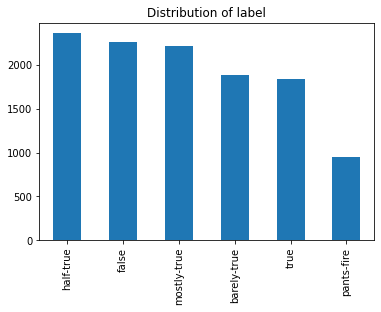

In [8]:
liardata.tag.value_counts().plot(kind = 'bar')
plt.title('Distribution of label')
plt.show()

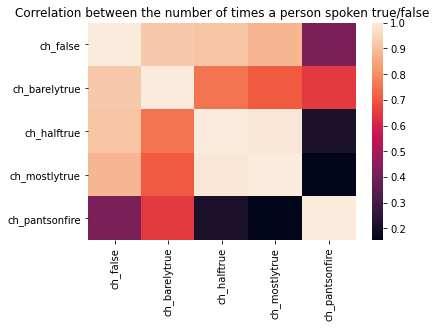

In [13]:
#For each speaker, checking the correlation between the type of information he/she has given
tagcounts = liardata[['ch_false','ch_barelytrue','ch_halftrue','ch_mostlytrue','ch_pantsonfire']]
corr = tagcounts.corr()
plt.title('Correlation between the number of times a person spoken true/false')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [18]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, solver = 'liblinear')),
               ])

X = train.news
y = train.tag

X_test = validation.news
y_test = validation.tag

logreg.fit(X, y)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.2283710054559626
